In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fbprophet.plot as fp
import sqlalchemy as sa
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet
from datetime import datetime
from datetime import time
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
np.set_printoptions(suppress=True, precision=4)

In [20]:
_df = pd.read_csv('C:\\Users\\Okuma\\Downloads\\AI\\MASARU-jntest-data.csv', parse_dates=[0])
_df

,ds,weight(kg),BMI,fat(%),LBW(kg),subcutaneous(%),visceral fat,water(%),skeletal muscle(%),muscle(kg),bone(kg),protein(%),BME(kcal),body age
0,2020-12-01 01:56:00,78.0,26.7,27.50,56.59,24.4,9,52.4,46.9,53.72,2.83,16.49,1591,41
1,2020-12-01 08:21:00,77.4,26.5,27.20,56.34,24.2,9,52.6,47.0,53.53,2.82,16.61,1587,40
2,2020-12-01 22:44:00,77.5,26.5,27.20,56.39,24.2,9,52.5,47.0,53.60,2.82,16.63,1588,40
3,2020-12-02 08:26:00,77.8,26.6,27.40,56.52,24.3,9,52.5,46.9,53.66,2.83,16.52,1590,40
4,2020-12-03 00:27:00,77.5,26.5,27.20,56.41,24.2,9,52.6,47.0,53.60,2.82,16.61,1588,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,2021-04-27 21:11:00,64.8,21.9,13.10,56.31,11.5,5,62.7,56.1,53.50,2.80,19.80,1586,35
403,2021-04-28 07:51:00,64.9,21.9,13.14,56.37,11.6,5,62.7,56.1,53.60,2.80,19.80,1587,35
404,2021-04-28 19:11:00,64.7,21.9,13.06,56.25,11.5,5,62.8,56.2,53.40,2.80,19.80,1584,35
405,2021-04-29 09:21:00,64.7,21.9,13.06,56.25,11.5,5,62.8,56.2,53.40,2.80,19.80,1584,35


In [21]:
df = _df[['ds', 'weight(kg)']]
df

,ds,weight(kg)
0,2020-12-01 01:56:00,78.0
1,2020-12-01 08:21:00,77.4
2,2020-12-01 22:44:00,77.5
3,2020-12-02 08:26:00,77.8
4,2020-12-03 00:27:00,77.5
...,...,...
402,2021-04-27 21:11:00,64.8
403,2021-04-28 07:51:00,64.9
404,2021-04-28 19:11:00,64.7
405,2021-04-29 09:21:00,64.7


<AxesSubplot:xlabel='ds'>

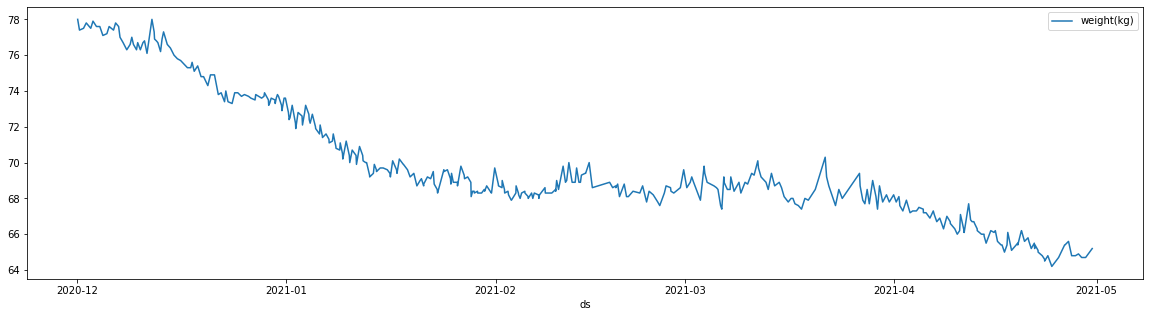

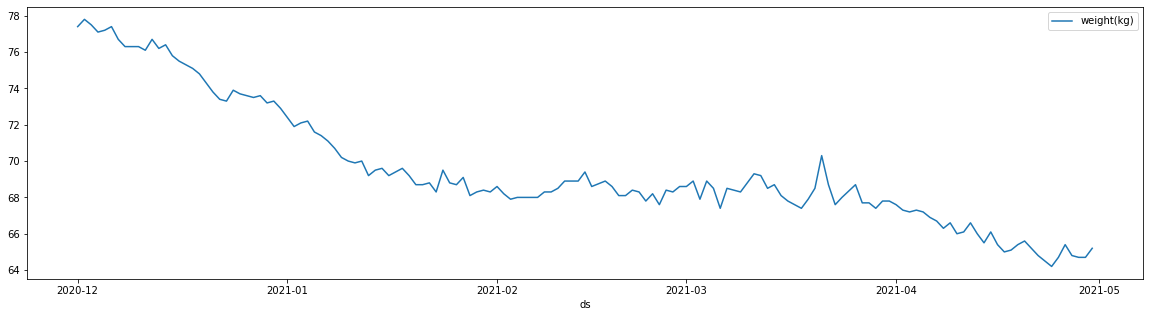

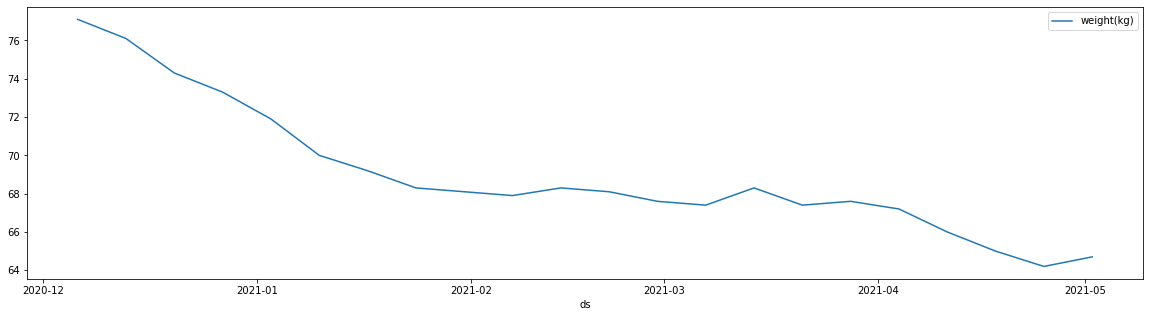

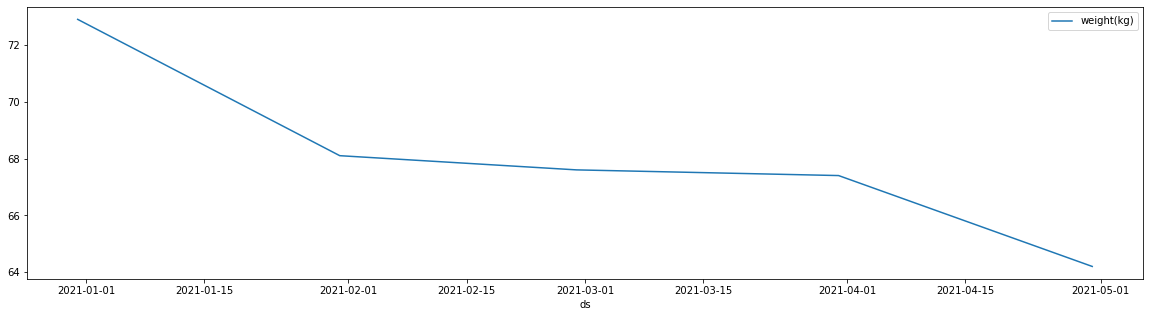

In [26]:
df_ = df.copy()
df_ = df_.set_index('ds')
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=df_)
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=df_.resample("D").min())
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=df_.resample("W").min())
fig = plt.subplots(figsize=(20,5))
sns.lineplot(data=df_.resample("m").min())

<AxesSubplot:xlabel='time', ylabel='weight(kg)'>

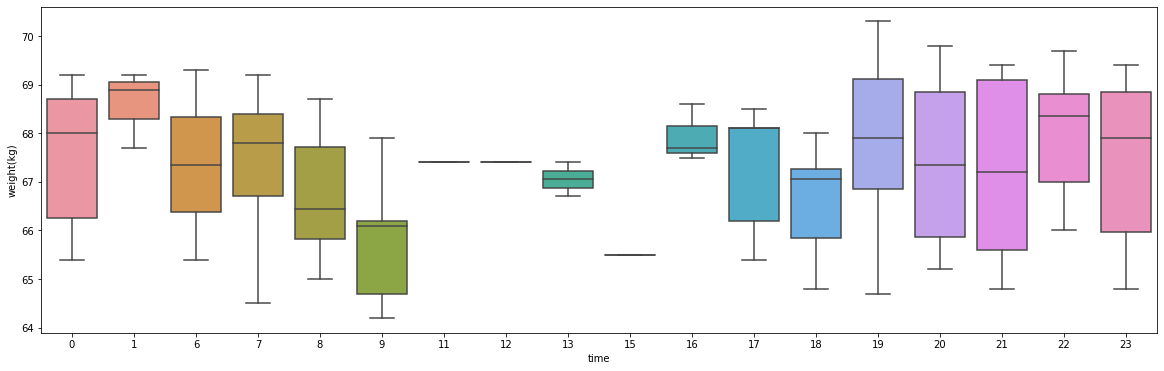

In [25]:
df_ = df.copy()
df_ = df_[(df_['ds'] >= datetime(2021,3,1)) & (df_['ds'] < datetime(2021,4,30))]
df_['time'] = df_['ds'].dt.hour
plt.figure(figsize=(20,6))
sns.boxplot(x="time", y="weight(kg)", data=df_,)

<AxesSubplot:xlabel='day', ylabel='weight(kg)'>

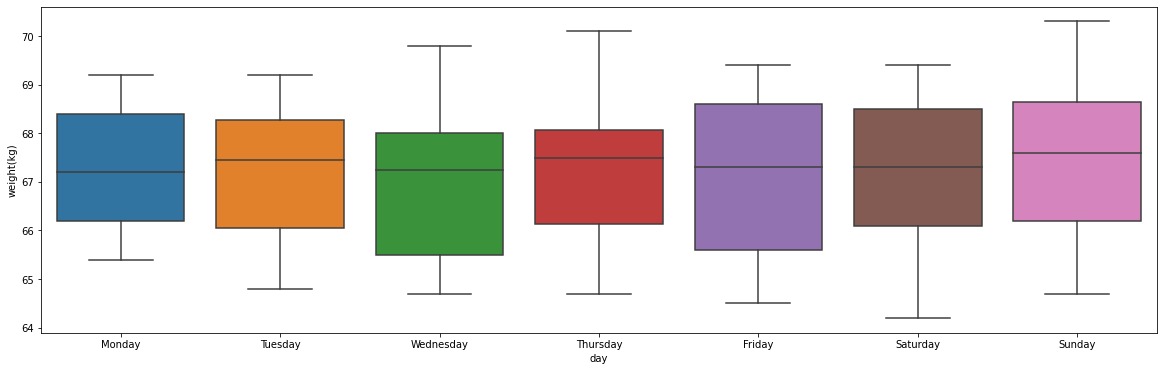

In [24]:
df_ = df.copy()
df_ = df_[(df_['ds'] >= datetime(2021,3,1)) & (df_['ds'] < datetime(2021,4,30))]
df_ = df_.set_index('ds')
df_["day"] = df_.index.strftime("%A")
plt.figure(figsize=(20,6))
sns.boxplot(x="day", y="weight(kg)", data=df_,)

In [27]:
dfp = df.rename(columns={'weight(kg)': 'y'})
model = Prophet()
model.fit(dfp)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [28]:
future = model.make_future_dataframe(30, freq='D')
forecast = model.predict(future)

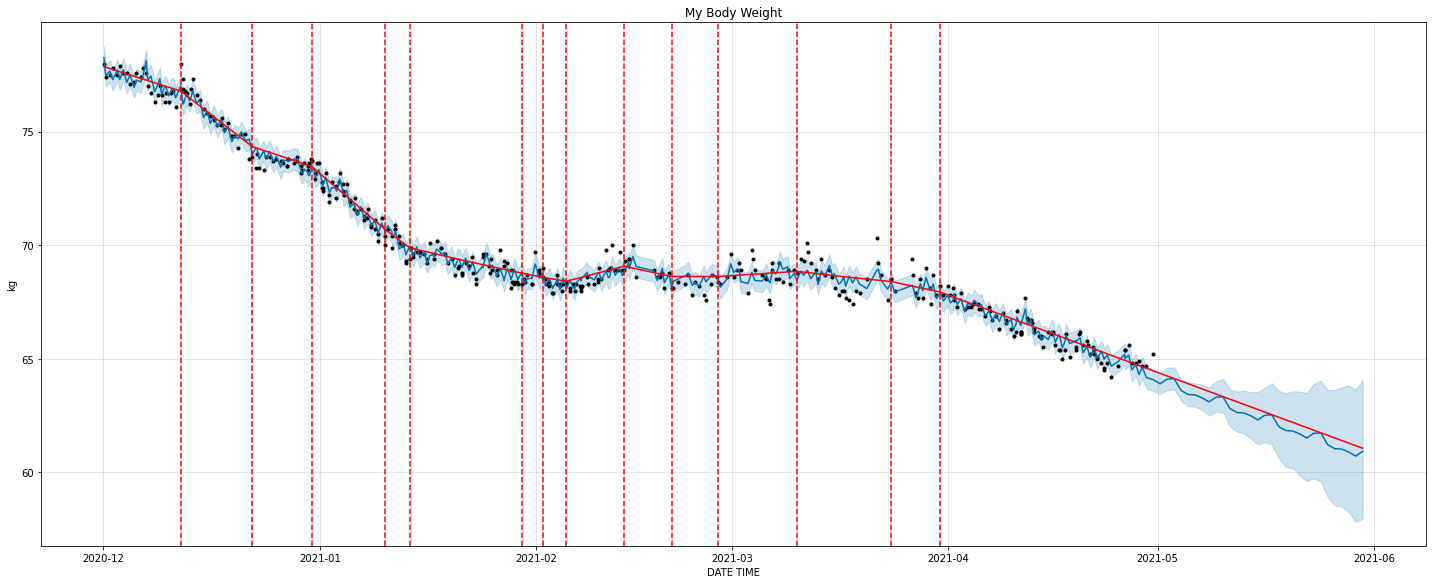

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
fig = model.plot(forecast, ax=ax)
ax.set_title('My Body Weight')
ax.set_xlabel('DATE TIME')
ax.set_ylabel('kg')
a = add_changepoints_to_plot(fig.gca(), model, forecast)

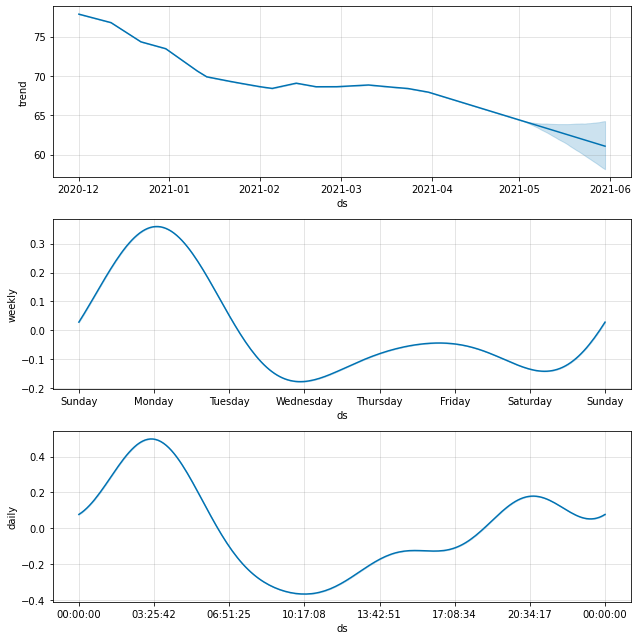

In [32]:
fig = model.plot_components(forecast)

In [30]:
df_cv = cross_validation(model, horizon = '25 days')
df_p = performance_metrics(df_cv, rolling_window=0.1)
df_p

INFO:fbprophet:Making 5 forecasts with cutoffs between 2021-02-14 08:46:00 and 2021-04-05 08:46:00


  0%|          | 0/5 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,3 days 11:17:00,0.361755,0.601461,0.492839,0.007202,0.006991,0.517241
1,3 days 12:16:00,0.365175,0.604297,0.501803,0.007332,0.006991,0.517241
2,3 days 12:18:00,0.366868,0.605696,0.505531,0.007387,0.006991,0.517241
3,3 days 15:11:00,0.352073,0.593358,0.486681,0.007105,0.006958,0.551724
4,3 days 19:47:00,0.301819,0.549380,0.464722,0.006806,0.006958,0.551724
...,...,...,...,...,...,...,...
255,24 days 21:59:00,3.490027,1.868161,1.642904,0.024763,0.024470,0.724138
256,24 days 23:12:00,3.379929,1.838458,1.581521,0.023815,0.019906,0.724138
257,24 days 23:18:00,3.271240,1.808657,1.545617,0.023264,0.018711,0.758621
258,24 days 23:47:00,3.399539,1.843784,1.588623,0.023889,0.018711,0.724138


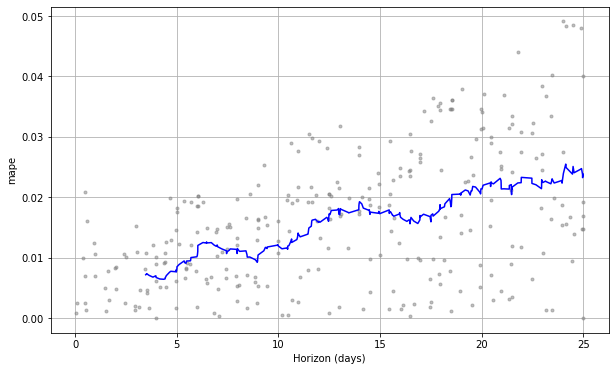

In [31]:
plot_cross_validation_metric(df_cv, metric='mape');